<a href="https://colab.research.google.com/github/amunoz88/Applied_DS_2025/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics as skm
import sklearn.compose as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
from scipy import stats

0      3
1      5
2      5
3      4
4      4
      ..
995    4
996    5
997    4
998    2
999    1
Name: X, Length: 1000, dtype: int64


NameError: name 'np' is not defined

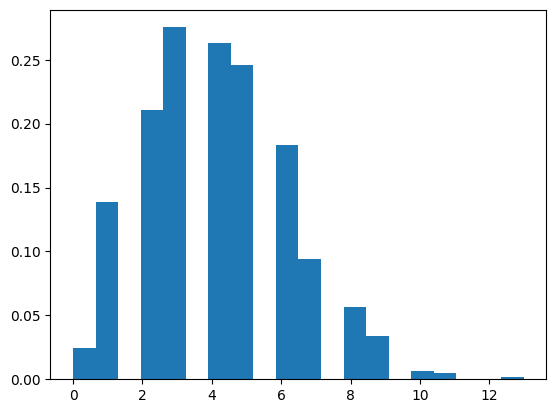

In [3]:
data = pd.read_csv("/content/drive/MyDrive/CUNY 2025/Datasets/poisson.csv")
print(data.X)
plt.hist(data.X, bins=20, density=True)
theta = np.mean(data.X)
print(theta)
probs = stats.poisson(theta).pmf(range(0,11))
plt.plot(range(0,11), probs)

Visit https://www.kaggle.com/datasets/wenruliu/adult-income-dataset download the dataset and upload it to Colab


In [5]:
import numpy as np
# Replace with the correct path.
data = pd.read_csv("/content/adult.csv")
data['label'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data = data.drop('income', axis=1)
#print(data)

#Replace column names
columns=data.columns
columns = [c.replace("-", "_") for c in columns]
data.columns = columns

NUMERICAL = ['fnlwgt','educational_num', 'capital_gain', 'capital_loss','age', 'hours_per_week']
CATEGORICAL = list(set(data.columns) - set(NUMERICAL))
CATEGORICAL.remove('label')

# Transform data in columns to have mean zero and standard deviation 1. This
# seems to help a bit with the numerical instability issues. In class we did
# MinMax Scaler but this seems to work better.
column_transformer = skc.ColumnTransformer(
    [('std', skp.StandardScaler(), NUMERICAL)],
    remainder='passthrough',
    verbose_feature_names_out=False
)


data = pd.DataFrame(column_transformer.fit_transform(data), columns=column_transformer.get_feature_names_out())
features = []

print(np.mean(data.capital_loss))
#Create formula
for c in data.columns:
  if c == 'label':
    continue
  features.append(c)

  model_string =  'label~' + "+".join(features)

# Transformer makes columns into objects. We remap them to floats.
for c  in NUMERICAL:
  data[c] = data[c].astype(float)
data.label = data.label.astype(int)

# LBFGS is an optimization method that usually works well.
# Number of iterations is the number of iterations for the optimization method.
print(smf.logit(model_string,data).fit(maxiter=500, method='bfgs').summary())



7.617581999352657e-17
Optimization terminated successfully.
         Current function value: 0.316047
         Iterations: 354
         Function evaluations: 355
         Gradient evaluations: 355
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48743
Method:                           MLE   Df Model:                           98
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                  0.4256
Time:                        21:23:36   Log-Likelihood:                -15436.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

In [6]:
from sklearn.linear_model import LogisticRegression

train = data.sample(frac=0.8, random_state=1)
test = data.drop(train.index)
column_transformer = skc.ColumnTransformer(
    [('minmax', skp.MinMaxScaler(), NUMERICAL),
    ('cat', skp.OneHotEncoder(handle_unknown='ignore'), CATEGORICAL)],
    remainder='drop',
    verbose_feature_names_out=False
)

transformed_data = column_transformer.fit_transform(train)
#print(transformed_data)
# print(transformed_data.shape)

# test_transformed_data = column_transformer.transform(test)
# print(test_transformed_data.shape)
model = LogisticRegression(C= 100).fit(transformed_data, train.label.values)
print(model.predict_proba(transformed_data))
print(model.predict(transformed_data))
skm.accuracy_score(train.label.values, model.predict(transformed_data))
# print(model.coef_)
# print(model.intercept_)

[[0.9937937  0.0062063 ]
 [0.98923809 0.01076191]
 [0.86142183 0.13857817]
 ...
 [0.97756443 0.02243557]
 [0.99196168 0.00803832]
 [0.99507482 0.00492518]]
[0 0 0 ... 0 0 0]


0.8545580181194656

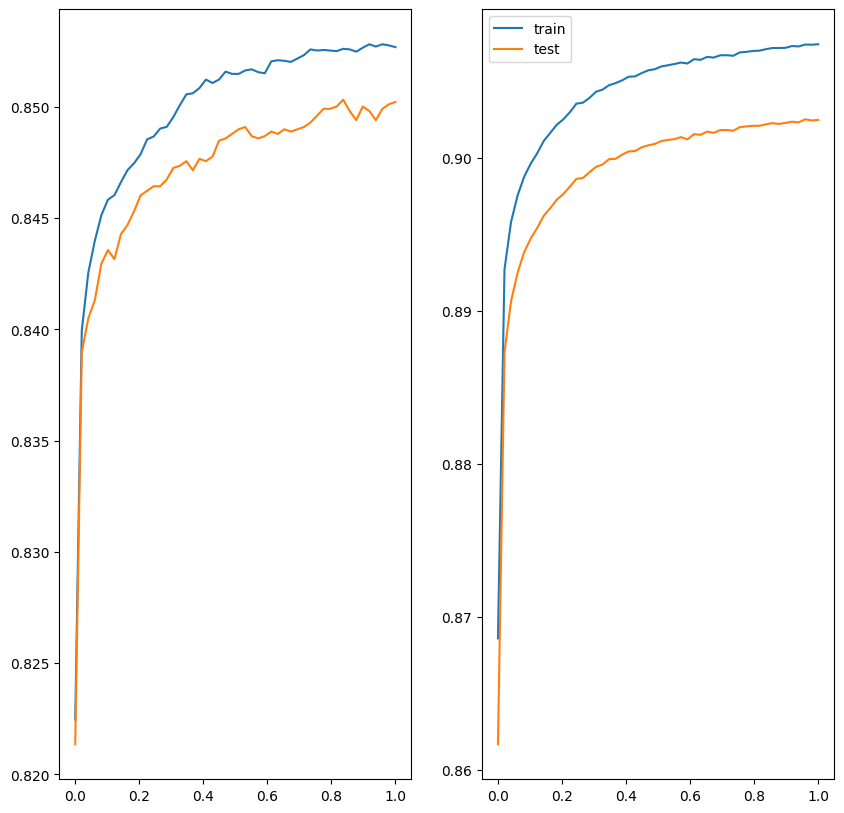

In [7]:
test = data.drop(train.index)
transformed_test = column_transformer.transform(test)
train_accs = np.zeros(50)
test_accs = np.zeros(50)
train_aucs = np.zeros(50)
test_aucs = np.zeros(50)
for i,C in enumerate(np.linspace(0.001, 1, 50)):
  model = LogisticRegression(C=C).fit(transformed_data, train.label.values)
  train_accs[i] = skm.accuracy_score(train.label.values, model.predict(transformed_data))
  test_accs[i] = skm.accuracy_score(test.label.values, model.predict(transformed_test))
  train_aucs[i] = skm.roc_auc_score(train.label.values, model.predict_proba(transformed_data)[:,1]) # Predict proba predicts two probabilities, we use the second column (since it is the one that predicts the probability of positive label)
  test_aucs[i] = skm.roc_auc_score(test.label.values, model.predict_proba(transformed_test)[:,1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2,1)
ax.plot(np.linspace(0.001, 1, 50), train_accs, label='train')
ax.plot(np.linspace(0.001, 1, 50), test_accs, label='test')
ax = fig.add_subplot(1, 2,2)
ax.plot(np.linspace(0.001, 1, 50), train_aucs, label='train')
ax.plot(np.linspace(0.001, 1, 50), test_aucs, label='test')
plt.legend()
plt.show()

In [8]:
skm.roc_auc_score(test['label'], model.predict(test_transformed_data))
skm.accuracy_score(test['label'], model.predict(test_transformed_data) > 0.5)

NameError: name 'test_transformed_data' is not defined

In [ ]:
from keras import datasets

In [ ]:
(Xtrain, ytrain), (Xtest, ytest) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


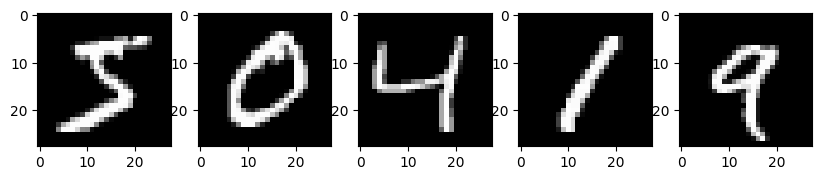

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(5):
  ax = fig.add_subplot(1, 5,i+1)
  ax.imshow(Xtrain[i], cmap='gray')
plt.show()